### 说明：

这是Udacity Machine Learning Nanodegree中Decision Trees部分的作业，此作业不光包含了决策树，同时也包含了网格参数优化等。我们在完成基本作业的基础上也实现了决策树的可视化。

GitHub：https://github.com/liuyujieccnu/udacity_mlend

# Lab: Titanic Survival Exploration with Decision Trees

## Getting Started
In this lab, you will see how decision trees work by implementing a decision tree in sklearn.

We'll start by loading the dataset and displaying some of its rows.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Set a random seed
import random
random.seed(42)

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Recall that these are the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code cell below to remove **Survived** as a feature of the dataset and store it in `outcomes`.

请记住，这些是船上每个乘客的不同特点：
- **存活**：存活结果（0=否；1=是）
- **P类**：社会经济类（1=上层阶级；2=中产阶级；3=下层阶级）
- **姓名**：旅客姓名
- **性别**：乘客性别
- **年龄**：乘客年龄（有些条目包含`NaN`）
- **SIBSP**：乘客的兄弟姐妹和配偶人数
- **Parch**：乘客的父母和子女人数
- **车票**：旅客车票号
- **票价**：旅客支付的票价
- **客舱**乘客的客舱编号（有些条目包含`NaN`）
- **上船**：旅客的上船港（C=瑟堡；Q=皇后镇；S=南安普顿）

由于我们对每位乘客或机组成员的生存结果感兴趣，我们可以从该数据集中删除**生存**功能，并将其存储为自己的单独变量“结果”。我们将把这些结果作为我们的预测目标。
运行下面的代码单元格，将**survived**作为数据集的一个功能删除，并将其存储在“outcouts”中。

In [2]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
features_raw = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(features_raw.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The very same sample of the RMS Titanic data now shows the **Survived** feature removed from the DataFrame. Note that `data` (the passenger data) and `outcomes` (the outcomes of survival) are now *paired*. That means for any passenger `data.loc[i]`, they have the survival outcome `outcomes[i]`.

## Preprocessing the data

Now, let's do some data preprocessing. First, we'll one-hot encode the features.

将离散型特征的每一种取值都看成一种状态，若你的这一特征中有N个不相同的取值，那么我们就可以将该特征抽象成N种不同的状态，one-hot编码保证了每一个取值只会使得一种状态处于“激活态”，也就是说这N种状态中只有一个状态位值为1，其他状态位都是0。

In [3]:
features = pd.get_dummies(features_raw)
features

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,19.0,0,0,30.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,3,NaN,1,2,23.4500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,890,1,26.0,0,0,30.0000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


And now we'll fill in any blanks with zeroes.

In [4]:
features = features.fillna(0.0)
display(features.head())

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Training the model

Now we're ready to train a model in sklearn. First, let's split the data into training and testing sets. Then we'll train the model on the training set.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

In [6]:
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# Define the classifier, and fit it to the data
model = DecisionTreeClassifier().fit(X_train,y_train)

## Testing the model
Now, let's see how our model does, let's calculate the accuracy over both the training and the testing set.

In [7]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 0.8044692737430168


# Improving the model

Ok, high training accuracy and a lower testing accuracy. We may be overfitting a bit.

So now it's your turn to shine! Train a new model, and try to specify some parameters in order to improve the testing accuracy, such as:
- `max_depth`
- `min_samples_leaf` 每片叶子的最小样本数
- `min_samples_split` 每次拆分的最小样本数

You can use your intuition, trial and error, or even better, feel free to use Grid Search!

**Challenge:** Try to get to 85% accuracy on the testing set. If you'd like a hint, take a look at the solutions notebook next.

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,make_scorer 

parameters= { 'max_depth' :[2,4,6,8,10,15], 'min_samples_leaf':[2,4,6,8,10], 'min_samples_split': [2,4,6,8,10,11]}
clf = DecisionTreeClassifier(random_state=10)
f1_scorer = make_scorer(f1_score) #2*Precision*Recall/Precision+Recall
gs = GridSearchCV(estimator=clf,param_grid=parameters,error_score=f1_score).fit(X_train,y_train)
best_clf = gs.best_estimator_

# Train the model
model = best_clf.fit(X_train,y_train)

# Make predictions
y_test_pred  = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Calculate the accuracy
test_accuracy = accuracy_score(y_test,y_test_pred)
train_accuracy = accuracy_score(y_train,y_train_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)
best_clf

//anaconda3/envs/uda_MLND/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The training accuracy is 0.8707865168539326
The test accuracy is 0.8547486033519553


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [9]:
from graphviz import Source
from sklearn import tree
from IPython.display import SVG
from IPython.display import display
from IPython.display import Image 
import pydotplus 

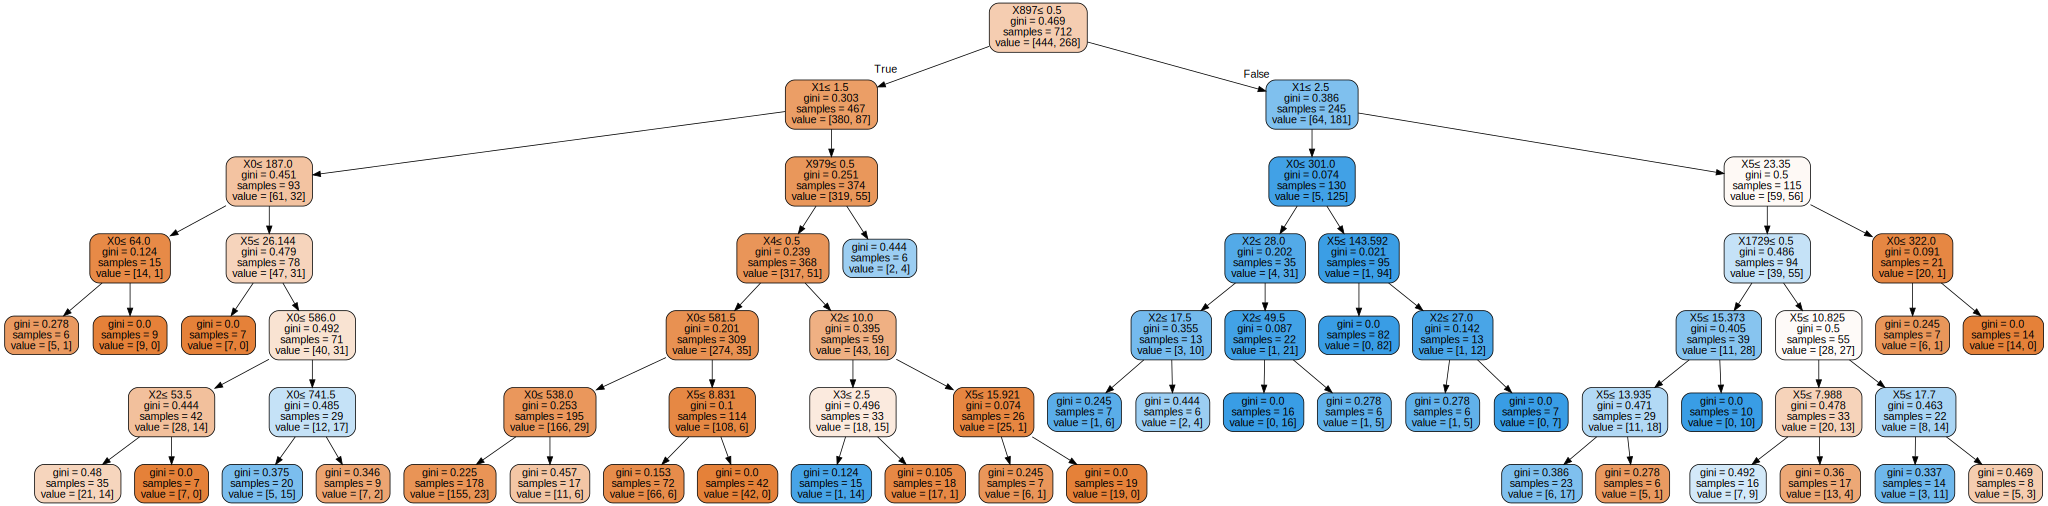

In [10]:
graph = Source(tree.export_graphviz(model, 
                                    out_file=None, 
                                    filled=True, 
                                    rounded=True,  
                                    special_characters=True))
display(SVG(graph.pipe(format='svg')))

In [11]:
import datetime
print("Last executed on "+ datetime.datetime.now().strftime("%d-%b-%Y %H:%M"))

Last executed on 04-Nov-2019 10:24
